# Time Series Decomposition

## Problem Definition

Given a time series: $ y = S + T + E $

Decompose into:
- **T**: Trend/Cycle
- **S**: Seasonal
- **E**: Error (White Noise)


## Extract Trend
- Moving Average
    * For example: 7 \* MA for weekly data
    
    
- Moving Average of Moving Average 
    * For example: 2 \* 12 MA for monthly data, 2 * 4 MA for quarterly data
    * In R: `ma(time_series, order=12, centre = TRUE)` 2 \* 12 MA 
    
    
- Weighted Moving Average
    * 2 * 4 MA is a special case. i.e., W = [1/8, 1/4, 1/4, 1/4, 1/8] 

## Decomposition
Basic Approach:
1. Calculate De-trended data by using MA or 2 - m MA or m MA: **T**
1. Simple average of, for example, all January data. Adjust 12 values to sum up to zero. **S**
1. The remainder is error **E**


---


Issues: 
- No observation for beginning/ending
- Constant seasonal components over years
- Not robust to outliers


---


Other Methods:
- X-12-ARIMA Decomposition 
- STL Decomposition
    * Handle any type of seasonality
    * Change of seasonality over time
    * Users have control over smoothness
    * Robust to outliers
    
---

Forecast with decompositions:
- Naive forecast for seasonal component (assume no change, take from last year)
- For T and E
    * Random walk with drift model
    * Holt's method
    * non-seasonal ARIMA with differencing

# Time series forecasting

<img src="./fig/ExponentialSmoothing.jpeg" width="600">

Ref: https://robjhyndman.com/talks/MelbourneRUG.pdf

## Simple Exponential Smoothing


- $\hat x_{t+1} = \alpha x_t + (1-\alpha) x_{t-1}$
- $\hat x_{t+1} = (1 - \alpha)(x_t + \alpha x_{t-1} + \alpha^2 x_{t-2} + ...)$

## Holt-Winters Additive method
- Main idea
    * Base
    * Error
- Key:
    - Y := L + 1 * b + S
    - L := L + b
    - S := S
    - b := b
    
    - L1 = (Y - S) 
    - L2 = L + b
    
    - S1 = Y - l - b
    - S2 = S
    
    - b1: L - L
    - b2: b

- Forecast = **level** + **trend** + **seasonal component** <br/>
$ \hat{y}_{t+h|t} = l_t + hb_t + s_{last} $


- Level = Seasonal Adjusted Observation + Non-seasonal Forecast for t <br/>
$l_t = \alpha(y_t - s_{t-m}) + (1 - \alpha)(l_{t-1} + b_ {t-1})$


- Trend = Change in level + Trend from last year <br/>
$ b_t = \beta(l_t - l_{t-1}) + (1-\beta)b_{t-1}$


- Seasonal = Current seasonal index + Seasonal index from last year <br/>
$ s_t = \gamma(y_t - l_{t-1} - b_{t-1} )+ (1-\gamma)(s_{t-m}) $


- Unified error correction form:<br/>
$ \theta := \theta + \alpha * error $<br/>
$ error = y_t - (l_{t-1} + b_{t-1} + s_{t-m}) $

## Other methods
1. Damped Trend Model:
    - Short-run: trended
    - Long-run: constant
    - $ \hat{y}_{t+h|t} = ... + (\phi + \phi + ... + \phi^h)b_t + ... $
1. Exponential Trend Model
    - $ \hat{y}_{t+h|t} = l_tb^h_t $
1. Holt's linear Trend model
    - No seasonal term




# AR(1) and MA(1) Model
## Defniition of stationary series
**Definition of weak stationarity**

- $ E(Y_t) = 0 $ <br/>
- $ Var(Y_t) = constant $
- $ Cov(Y_t, Y_{t-k}) = \gamma_k $
- Think of The covariance matrix

## AR(1) Model
$ Y_t = c + \phi Y_{t-1} + \epsilon_t,\ where\ \epsilon\ - iid(0, \sigma^2) $



- Mean: 
    - $Y_t = c \sum_{i=0}^{t-1}\phi^i + \phi^t Y_0 + \sum_{i=0}^{t-1} \phi^i a_{t-i}$
    - $E(Y_t) = c \sum_{i=0}^{t-1}\phi^i + \phi^t Y_0$


- Condition for stationary
    - When $|\phi|<1,$ $\mu = E(Y_t) = \frac{c}{1-\phi}$
    - Root of operator: $(1-\phi B) = 0, B= \frac{1}{\phi}$
    - if $ \phi = 1 $ and $ c = 0 $ : random walk
    - if $ \phi = 1 $ and $ c <> 0 $ : random walk **with drift**


- Variance
    - If c=0, $Y_t - \phi Y_{t-1} = (1-\phi B) = \epsilon_t$
    - If c=0, $\sigma^2_Y = \phi^2 \sigma^2_Y + \sigma^2_{\epsilon}$, $\sigma^2_Y = \frac{\sigma^2_{\epsilon}}{1- \phi^2}$
    
    
- Autocovariance
    - If c=0, $\gamma_k = E(Y_{t-k}Y_t) = E[Y_{t-k}(\phi Y_{t-1} + \epsilon_t)] = \phi  E(Y_{t-k}Y_{t-1}) = \phi \gamma_{k-1}$
    - $\gamma_0 = E(Y_{t}Y_t) = \sigma^2_Y$
    
    
- Representation by error term
    - If c=0, $Y_t = \epsilon_t + \phi \epsilon_{t-1} + \phi^2 \epsilon_{t-1} + ...$
    - $Y_t = \sum_{j=0}{}{\phi^j \epsilon_{t-j}}$, which is $MA(\infty$)
    - Indication: **keep "long" memory with decreasing weights**


## MA(1) Model
$ Y_t = c + \epsilon_t - \theta\epsilon_{t-1},\ where\ \epsilon\ - iid(0, \sigma^2) $
<br/>
- If c=0, $Y_t = (1-\theta B)\epsilon_t$
- Always stationary


- Mean
    - $E(Y_t) = \mu$
    

- Variance
    - $\sigma^2_Y = E(Y^2_t) = \sigma^2_{\epsilon}(1+\theta^2)$
    

- Covariance
    - $\gamma_1 = E(Y_t Y_{t-1}) = -\theta \sigma_{\epsilon}^2$
    - $\gamma_2 = \gamma_3 = ... = 0$

Indication: **noise / shock quickly vanishes with time.**

Note: Difference between MA *model* and MA *smoothing*
- MA model: forecast stationary series
- MA *smoothing*: forecast trend


## Comparison/ Connection between AR and MA

- AR model can be represented by $MA(\infty)$ model with restrictions on the decay pattern of coefficients

- MA model has finite terms with no restrictions on coefficients

- AR model has many non-zero autocorrelation with decay pattern

- MA model has a few non-zero autocorrelation with no restriction

- It can be proved that:
    - $AR(p) + AR(0) = ARMA(p,p)$
    - $AR(p) + AR(q) = ARMA(p + q,max(p,q))$
    - $MA(p) + MA(q) = MA(max(p,q))$

# ARIMA model 

## Integrated Process / Non-stationary

- I(2) means the series need to be differenced TWICE in order to be stationary
- For example: random walk: $ Y_t = Y_{t-1} + \epsilon_t $ is $I(1)$
- For example: stationary process: $I(0)$


- Special Case : $Y_t - Y_{t-1} = c + (\epsilon_t - \theta \epsilon_{t-1})$
- $\theta=0$: random walk
- $c=0, |\theta| <1$: simple exponential smoothing

***Random walk***

$ Y_t = c + \phi Y_{t-1} + \epsilon_t$
- If $\phi = 1$, $\Delta Y_t = c + \epsilon_t$
    - Or: $Y_t = ct + \epsilon_{t} + \epsilon_{t-1}+ \epsilon_{t-2} + ...$
- Unlike stationary process, constant $c$ is very important in defining non-stationary process
    - $E(Y_t) = ct$
    - $\sigma^2_Y = \sigma^2_{\epsilon}t$
    - $cov(t, t+k) = \sigma^2_{\epsilon}t$
<img src="./fig/random_walk.png" width="300">

***Simple Exponential Smooth (SES)***

* $ y_t = Y_t - Y_{t-1} = \mu - \theta \epsilon_{t-1} + \epsilon_t$, where it is a combination of *deterministic trend* and *stochastic trend*.
* $ \mu$ is the constant term. Let $\mu=0, |\phi|<1$,
    - $E(Y_t) = \mu t$. If $\mu$ = 0, $ Y_t - Y_{t-1} =  - \theta \epsilon_{t-1} + \epsilon_t$.
    
    
* $ Y_t = \epsilon_t + Y_{t-1} - \theta\epsilon_{t-1} = \epsilon_t + Y_{t-1} - \theta(Y_{t-1} - Y_{t-2} + \theta\epsilon_{t-2}) + ...... $
* $ Y_t = \epsilon_t + (1-\theta) Y_{t-1}  + \theta(1-\theta)Y_{t-2} + \theta^2(1-\theta) Y_{t-3} +......$
* Equivalent: $AR(\infty)$ with infinite geometric progression

## Seasonality

- Base: $ y_t = \mu + \phi_1 y_{t-1} + ... + \phi_p y _{t-p} + \theta_1 e_{t-1} + ... + \theta_q e_{t-q} + e_t $

- Seasonal Differencing
    - Seasonaility: $E(Y_t) = E(Y_{t-s})$ where $Y$ is de-trended. The series has a seasonal period of $s$


- Types of Seasonality
    - let $n_t$ to be stationary, then $Y_t = S_t^{(s)} + n_t$
    - Deterministic effect:  $ S_t^{(s)} = S_{t+s}^{(s)} = S_{t+2s}^{(s)} = S_{t+3s}^{(s)} = ......$
    - Stationary effect: $ S_t^{(s)} = \mu^{(s)} + v_t$, where $\mu^{(s)}$ is mean for each season, and $v_t$ is another stationary process
    - Non-stationary effect: $ S_t^{(s)} = S_{t-s}^{(s)} + v_t$
    - Note: **Seasonal MA and AR terms**


- Seasonal differencing    
    - Convert non-stationary with seasonality to stationart process
    - Example: **$ARIMA(1,1,1)(1,1,1)_4$ without constant**
<img src="https://i.stack.imgur.com/NUA6V.png" width="500">

## Model Identification
### Test for stationarity

**Dickey Fuller Test of Stationarity (for AR1)**

- $ Y_t = \phi Y_{t-1} + \epsilon_t$
- $Y_t - Y_{t-1} = (\rho - 1) Y_{t-1} + \epsilon_t$
- Intuition: higher value will be followed with a decrease, and lower value will be followed with an increase; 
- Random walk with $\phi$ = 1 is not stationary since the last position do not imply increase or decrease
- Test if $(\rho-1)$ is zero or not, i.e., if $\rho$ is equal to one; If zero, then non-stationary

**Augmented Dickey Fuller (ADF) Test of Stationarity (for ARMA)**

- $Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} +... +\epsilon_t $
- $Y_t - Y_{t-1} = \rho Y_{t-1}  - \alpha_1 (Y_{t-1} - Y_{t-2}) - \alpha_2 (Y_{t-2} - Y_{t-3}) - ... + \epsilon_t $
- Intuition: for a non-stationary series, $Y_{t-1}$ will not provide relevant information in predicting the change in $Y_t$ besides the lagged changes $\Delta$
- In other words: measure if the contribution of lagged value $Y_{t-1}$ is significant or not
- How to lag length `k`? Use AIC, BIC for model selection, or default $(T-1)^{1/3}$

**Variations**
- Other options: KPSS test, hypothesis opsite


### Transformations

- Variance stablizing
    - Log
    - Square root
    - Box-cox transformation


- Mean stablizing
    - Regular differencing
    - Seasonal difference
    
    
- Log: fix exponentially trending
- Detrend: Y = (mean + trend * t) + error; Model trend from here 
- Differencing: 
    * First-order differencing: $Y_t - Y_{t-1} = ARMA(p,q)$ 
    * Seasonal differencing with period m: $Y_t - Y_{t-m} = ARMA(p,q)$
    * Here the order of differencing is `I` in AR(I)MA

### Identify `p` and `q`

**Two useful graphs**
- Auto Correlation Function (ACF):
    * A lag k aurocorrelation: $Corr(Y_t, Y_{t-k})$
    * AR(1): Gradually decrease with lag k
    * MA(1): Spike at lag 1, then zero for lag k > 1
    
    
- Partial Correlation Function (PACF):
    * Only measure the association between $Y_t, Y_{t-k}$
    * Exclude the effect of $Y_{t-1}, ..., Y_{t-(k-1)} $
    * $Y_t = \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + u_t$
    * $Y_{t-3} = \gamma_1 Y_{t-1} + \gamma_2 Y_{t-2} + v_t$
    * $PACF(t, t-3) = corr(u_t, v_t)$
    
<img src="./fig/acf_pacf.png" width="500">

---

<img src="./fig/acf_pacf_2.png" width="500">

---

<img src="./fig/acf_pacf_3.png" width="500">



## Model estimation and selection
- Use repeated KPSS tests to determine differenced d to achieve stationary series
- Use *Maximum Likelihood Estimation* to minimize $ e^2_t $
- The value of `p` and `q` are selected by minimizing $AIC$ using some search strategy
    - $AIC = -2log(L) + 2K = Tln \hat\sigma^2_{\epsilon} + 2K$
    - Error + Number of parameters
- Start from base ARIMA and add variations until no lower $AIC$ found
<img src="./fig/aic_bic.png" width="500">



## Model diagnostics for residuals
- Zero mean
- Constant variance
- No autocorrelation
- Normal distribution

## Forecasting and Evaluation
- https://www.otexts.org/fpp/8/8
<img src="https://i.stack.imgur.com/83BUy.png" width="400">




# Dynamic Regression: 


## ADL model (Autoregressive Distributed Lag) Model

- Formulation: $Y_t = \alpha + \delta t + \phi_1Y_{t-1} + \phi_2Y_{t-2} + ... + \phi_p Y_{t-p} + \beta_0X_t + \beta_1X_{t-1} + ... + \beta_qX_{t-q} + \epsilon_t$
- Where $\epsilon_t$ ~ $iid(0, \sigma^2)$

### If X and Y are stationary `I(0)`
- Run OLS on ADL model
- For interpretation purpose: rewrite ADL to be $\Delta Y_t = \alpha + \delta t + \phi Y_{t-1} + \gamma \Delta Y_{t-1} +\gamma_2\Delta  Y_{t-2} + ... + \gamma_p\Delta  Y_{t-p} + \theta X_t + \omega_1\Delta X_{t-1} + ... + \omega_q\Delta X_{t-q} + \epsilon_t$


- Long Term effect: $Y-Y = \phi Y + \theta X$
    * $\partial Y / \partial X = -\theta / \phi$
    * If X permanently increase by 1%, what percent with Y change
    
    
- Short Term effect: Not clear

### If X and Y are I(1)

In other words, X and Y has unit root I(1)
$Y_t = \alpha + \beta X_t + e_t$

- **Spurious Regression**: 

    - $\beta$ should be zero, but estimated $\beta$ not zero; ($e_t$ has a unit root, e_t is not stationary)
    - In other words, estimation is biased
    - Cannot use t tests because distributionb is no longer **t** or normal (error structure)
    - Possible fix: $\Delta Y_t = \Delta X_t + \Delta e_t$ as long as e is I(1), then $\Delta e_t$ is stationary. But different interpretation.
    

- **Cointegration**:
    -$e_t$ does **NOT** has a unit root --> $e_t$ is stationary, and is called **equilibrium error**
    - Premise: there exist unit root for X and Y
    - Test method (Engle-Granger Test): run unit root test (Dickey-Fuller Test) on residual $\hat Y_t - \hat\alpha - \hat\beta X_t $
    
    
- Under coitergration: still can run OLS with Y on X (**Cointegrating Regression**)
    - OLS: Estimate $Y_t = \alpha + \beta X_t $
    - $\beta$ is super-consistent
    - T stats not interpretable

    
    
- Under coiteration: call also run full ADL

### Error Correction Model (ECM)

- Premise: X and Y cointegrating I(1)
- Long-Run OLS: Estimate $Y_t = \alpha + \beta X_t + e_t$
- Short-Run OLS: $\Delta Y_t = \gamma \hat e_{t-1} + \omega_0 \Delta X_t + \epsilon_t$ 
- The short-run OLS above applies for **AR(1)**, can be easily proved. More lags for y and x can be added for arima models.
- Where $\hat e_t = Y_{t-1} - \hat \alpha - \hat \beta X_{t-1}$ and $\gamma <0$
- $\omega$ is the short-term effect  from $\Delta X$
- $e_{t-1}$ is error correction term, move towards equilibrium

Relationship with ADL:
- Special Case of ADL for I(1) variables

Ref: http://web.sgh.waw.pl/~atoroj/econometric_methods/lecture_6_ecm.pdf

## A special case: AR(1) for error term
- **Example of AR(1)**: Formulation
    * $y_t = \alpha + \beta x_t + \epsilon_t,\ where\ errors\ (\epsilon_t)\ is\ autocorrelated$ <br> 
        * What happens: solution not efficient any more, and statistical tests no longer apply
    * $ Assume\ \epsilon_t = \rho \epsilon_{t-1} + \omega_t\ where\ \omega\ - iid(0, \sigma^2) $ <br/>
    * Note: More appropriate ARMA model can be available
    * Similary, it can be shown/proved that the series $ \epsilon_t $ is stationary
  

- Rewrite assumtpion for stationary error
    * $ E(\epsilon ) = 0 $ <br/>
    * $ E(\epsilon^2 | X ) = \rho(\frac{\sigma^2}{1-\rho^2}) $ Homescedasticity <br/>
    * $ E(\epsilon_i \epsilon_j) = \rho_{|i-j|} * \sigma^2 $ What matters is proximity $k = |i-j|$
        * $ Corr(\epsilon_t, \epsilon_{t-1}) = \rho $
    
- Model assumptions
    * Stationarity for Y and X
    * Differencing may be needed
    

- How to solve for $\beta$?
    * One way: **Cochrane-Orcutt Method (Yule-Walker Method)**
    * OLS: $\hat{\epsilon_t} = y_t - \hat{\alpha} - \hat{\beta} * x_t$
    * OLS: $\hat{\epsilon_t} = \rho \hat{\epsilon_{t-1}} + \omega_t,\ solve\ for\ \hat{\rho}$
    * Re-formulate: $y_t^* = t_t - \rho y_{t-1} = \alpha(1-\hat{\rho}) + \beta* x_t^* + \omega_t,\ solve\ for\ \hat{\alpha}, \hat{\beta} $
    * Where $ y_t^* = t_t - \hat\rho y_{t-1}$
    * Re-iterate until convergence
    
    
    
- How to predict?
    * $F_{t+1} = \hat{y}_{t+1} + re_t$, combining regression part and ARMA part
    * how about X? model separately, given, or assume future values

## Test for auto-correlation of residuals
**Durbin-Watson test**
- $\epsilon_t = \rho \epsilon_{t-1} + \omega_t\ $
- Hypothesis
    * $H_0: \rho = 0$<br/>
    * $H_1: \rho <> 0$

- Test statistics

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7ldvxO8eWwkHL64DbkWEPQFkp8oMrRWEZDqjAcnLafBgJhjf6" width="200">

**Ljung-Box Q Test**
- Hypothesis
    * $H_0$: the autocorrelations up to lag k are all zero
    * $H_1$: At least one is not zero

- Test statistics

<img src="http://file.scirp.org/Html/2-1630023/1a6d69eb-051a-4f24-978c-ff1fd0cb5071.jpg" width="200">


# R Examples

In [ ]:
library(fpp)
library(forecast)
data(elecequip)
data(ausbeer)

## Timer Series Decomposition Example

### Import data

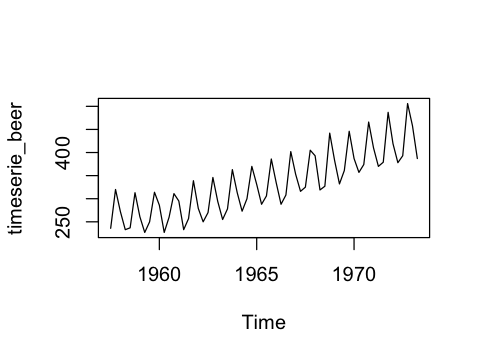

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
timeserie_beer = tail(head(ausbeer, 17*4+2),17*4-4)
plot(timeserie_beer)

In [3]:
ts_beer = ts(timeserie_beer, frequency = 4)
ts_beer

   Qtr1 Qtr2 Qtr3 Qtr4
1   236  320  272  233
2   237  313  261  227
3   250  314  286  227
4   260  311  295  233
5   257  339  279  250
6   270  346  294  255
7   278  363  313  273
8   300  370  331  288
9   306  386  335  288
10  308  402  353  316
11  325  405  393  319
12  327  442  383  332
13  361  446  387  357
14  374  466  410  370
15  379  487  419  378
16  393  506  458  387

### Use `STL` Package

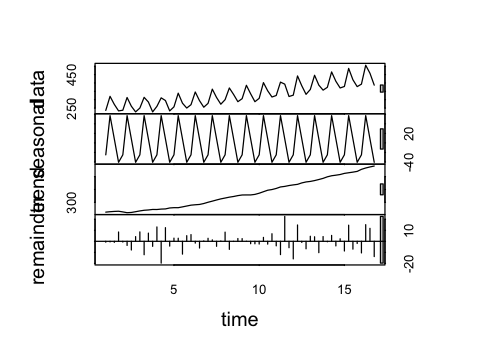

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
stl_beer = stl(ts_beer, s.window="periodic")

seasonal_stl_beer   <- stl_beer$time.series[,1]
trend_stl_beer     <- stl_beer$time.series[,2]
random_stl_beer  <- stl_beer$time.series[,3]
plot(stl_beer)

### Manually

In [5]:
# Use MA for trend
trend_beer = ma(ts_beer, order = 4, centre = T)
trend_beer

      Qtr1    Qtr2    Qtr3    Qtr4
1       NA      NA 265.375 264.625
2  262.375 260.250 261.125 262.875
3  266.125 269.250 270.500 271.375
4  272.125 274.000 274.375 277.500
5  279.000 279.125 282.875 285.375
6  288.125 290.625 292.250 295.375
7  299.875 304.500 309.500 313.125
8  316.250 320.375 323.000 325.750
9  328.250 328.750 329.000 331.250
10 335.500 341.250 346.875 349.375
11 354.750 360.125 360.750 365.625
12 369.000 369.375 375.250 380.000
13 381.000 384.625 389.375 393.500
14 398.875 403.375 405.625 408.875
15 412.625 414.750 417.500 421.625
16 428.875 434.875      NA      NA

In [6]:
# Remove Trend
detrend_beer = ts_beer - trend_beer
detrend_beer

      Qtr1    Qtr2    Qtr3    Qtr4
1       NA      NA   6.625 -31.625
2  -25.375  52.750  -0.125 -35.875
3  -16.125  44.750  15.500 -44.375
4  -12.125  37.000  20.625 -44.500
5  -22.000  59.875  -3.875 -35.375
6  -18.125  55.375   1.750 -40.375
7  -21.875  58.500   3.500 -40.125
8  -16.250  49.625   8.000 -37.750
9  -22.250  57.250   6.000 -43.250
10 -27.500  60.750   6.125 -33.375
11 -29.750  44.875  32.250 -46.625
12 -42.000  72.625   7.750 -48.000
13 -20.000  61.375  -2.375 -36.500
14 -24.875  62.625   4.375 -38.875
15 -33.625  72.250   1.500 -43.625
16 -35.875  71.125      NA      NA

In [7]:
# Calculate Average for each season
m_beer = t(matrix(data = detrend_beer, nrow = 4))
seasonal_beer = colMeans(m_beer, na.rm = T)
seasonal_beer

[1] -24.51667  57.38333   7.17500 -40.01667

In [8]:
# Remove season to get random error
random_beer = ts_beer - trend_beer - seasonal_beer
random_beer 

          Qtr1        Qtr2        Qtr3        Qtr4
1           NA          NA  -0.5500000   8.3916667
2   -0.8583333  -4.6333333  -7.3000000   4.1416667
3    8.3916667 -12.6333333   8.3250000  -4.3583333
4   12.3916667 -20.3833333  13.4500000  -4.4833333
5    2.5166667   2.4916667 -11.0500000   4.6416667
6    6.3916667  -2.0083333  -5.4250000  -0.3583333
7    2.6416667   1.1166667  -3.6750000  -0.1083333
8    8.2666667  -7.7583333   0.8250000   2.2666667
9    2.2666667  -0.1333333  -1.1750000  -3.2333333
10  -2.9833333   3.3666667  -1.0500000   6.6416667
11  -5.2333333 -12.5083333  25.0750000  -6.6083333
12 -17.4833333  15.2416667   0.5750000  -7.9833333
13   4.5166667   3.9916667  -9.5500000   3.5166667
14  -0.3583333   5.2416667  -2.8000000   1.1416667
15  -9.1083333  14.8666667  -5.6750000  -3.6083333
16 -11.3583333  13.7416667          NA          NA

### Comparison

In [9]:
# Compare with STL result
sum(abs(random_stl_beer - random_beer), na.rm = TRUE)

[1] 37.80729

In [10]:
# Compare with STL result
sum(abs(seasonal_stl_beer - seasonal_beer), na.rm = TRUE)

[1] 39.73431

In [11]:
# Compare with STL result
sum(abs(trend_stl_beer - trend_beer), na.rm = TRUE)

[1] 24.21835

### Forecasting

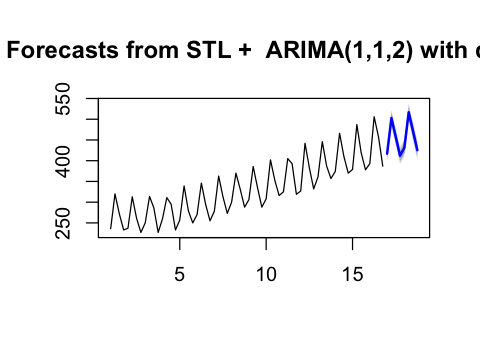

In [12]:
# Seasonal Components is unchanged
# De-seasonalized series is forecasted using the selected method: ARIMA, ETS, etc. 
fcast <- forecast(stl_beer, method="arima")
plot(fcast)

## Exponential Smoothing Example

### Holter-Winters

In [13]:
aust <- window(elecequip,start=1996)
fit1 <- hw(ts_beer,seasonal="additive")
fit2 <- hw(ts_beer,seasonal="multiplicative")

In [24]:
fit1$model

Holt-Winters' additive method 

Call:
 hw(y = ts_beer, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.0481 
    beta  = 0.0481 
    gamma = 0.1935 

  Initial states:
    l = 264.8493 
    b = -0.0815 
    s=-40.8994 7.0218 57.8872 -24.0096

  sigma:  10.3235

     AIC     AICc      BIC 
574.4282 577.7616 593.8582 

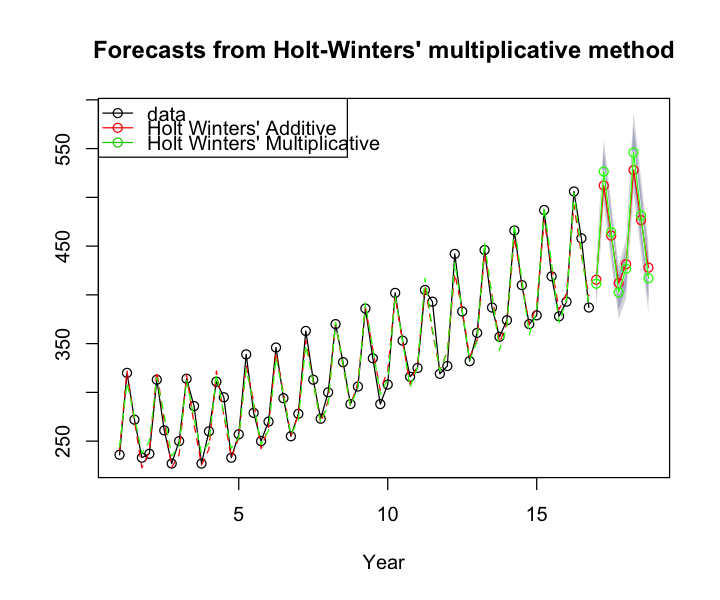

In [148]:
options(repr.plot.width=6, repr.plot.height=5)
plot(fit2,type="o", fcol="white", xlab="Year")
lines(fitted(fit1), col="red", lty=2)
lines(fitted(fit2), col="green", lty=2)
lines(fit1$mean, type="o", col="red")
lines(fit2$mean, type="o", col="green")
legend("topleft",lty=1, pch=1, col=1:3, c("data","Holt Winters' Additive","Holt Winters' Multiplicative"))

## Non-Seasonal ARIMA

- Use STL remove seasonal components
- No evidence of changing variance -> No need for log/BC transformation

In [149]:
eeadj = ts_beer - seasonal_stl_beer
eeadj 

       Qtr1     Qtr2     Qtr3     Qtr4
1  260.9647 262.8208 263.5958 273.6186
2  261.9647 255.8208 252.5958 267.6186
3  274.9647 256.8208 277.5958 267.6186
4  284.9647 253.8208 286.5958 273.6186
5  281.9647 281.8208 270.5958 290.6186
6  294.9647 288.8208 285.5958 295.6186
7  302.9647 305.8208 304.5958 313.6186
8  324.9647 312.8208 322.5958 328.6186
9  330.9647 328.8208 326.5958 328.6186
10 332.9647 344.8208 344.5958 356.6186
11 349.9647 347.8208 384.5958 359.6186
12 351.9647 384.8208 374.5958 372.6186
13 385.9647 388.8208 378.5958 397.6186
14 398.9647 408.8208 401.5958 410.6186
15 403.9647 429.8208 410.5958 418.6186
16 417.9647 448.8208 449.5958 427.6186

### Differencing, ACF, PACF

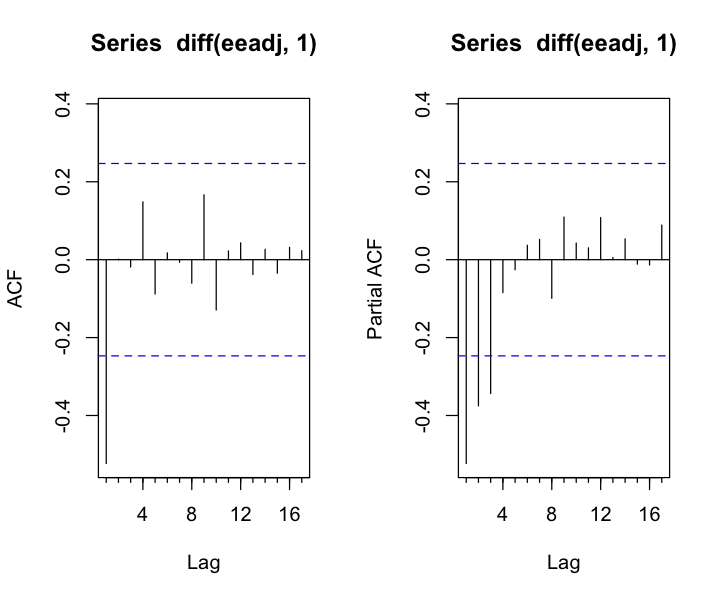

In [150]:
# Clearly there is trend, so 1st order differencing before ACF
par(mfrow=c(1,2))
Acf(diff(eeadj,1))
Pacf(diff(eeadj,1))
# Conclusion: MA 1, AR 1,2,3 ??

### Automatic Arima

In [151]:
fit <- auto.arima(eeadj, seasonal = FALSE,stepwise=FALSE, approximation=FALSE)
summary(fit)

Series: eeadj 
ARIMA(1,1,2) with drift 

Coefficients:
         ar1      ma1     ma2   drift
      0.9229  -1.8478  0.9119  2.5458
s.e.  0.0930   0.0991  0.0875  0.9360

sigma^2 estimated as 97.15:  log likelihood=-232.93
AIC=475.86   AICc=476.92   BIC=486.58

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.7940631 9.463641 7.478277 0.1204128 2.276898 0.5643983
                   ACF1
Training set -0.1224368


### Check Stationarity for Residual


	Box-Ljung test

data:  residuals(fit)
X-squared = 9.8552, df = 20, p-value = 0.9707


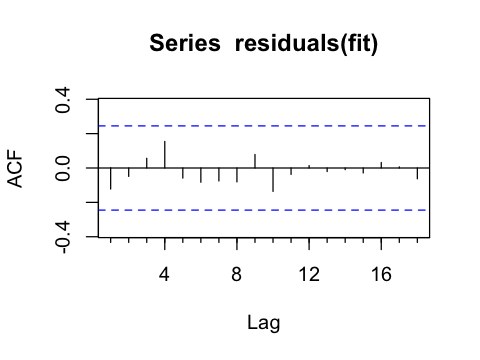

In [152]:
options(repr.plot.width=4, repr.plot.height=3)
Acf(residuals(fit))
Box.test(residuals(fit), lag=24, fitdf=4, type="Ljung") 
# Null: all autocorrelation is zero. Didn't reject null

### Generate Forecast

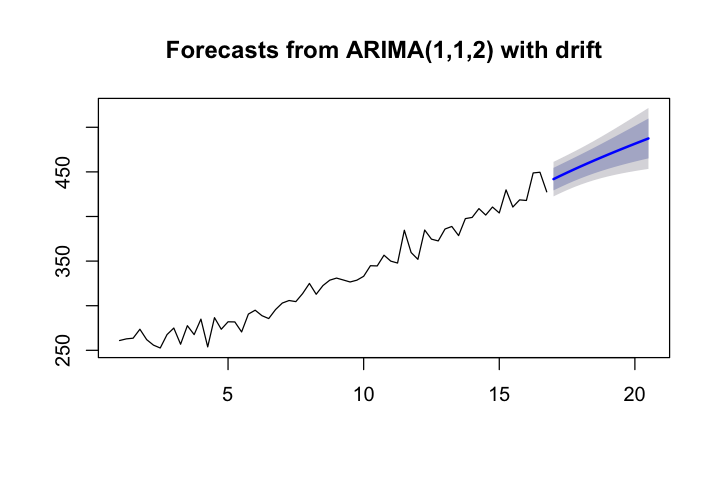

In [153]:
# Note: the forecast is for de-seasonalized component
options(repr.plot.width=6, repr.plot.height=4)
plot(forecast(fit,h=15),include=1000)

## Seasonal ARIMA

In [154]:
fit <- auto.arima(ts_beer,stepwise=FALSE, approximation=FALSE)
summary(fit)

Series: ts_beer 
ARIMA(1,1,1)(0,1,1)[4] 

Coefficients:
          ar1      ma1     sma1
      -0.3034  -0.7216  -0.5945
s.e.   0.1450   0.1017   0.1293

sigma^2 estimated as 109.1:  log likelihood=-222.26
AIC=452.52   AICc=453.26   BIC=460.83

Training set error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 2.63374 9.771197 7.559395 0.7426874 2.248993 0.5705204 -0.1525594


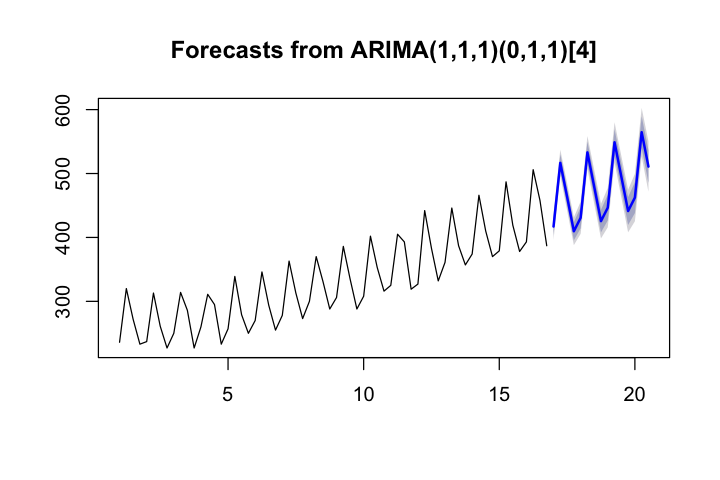

In [155]:
options(repr.plot.width=6, repr.plot.height=4)
plot(forecast(fit,h=15),include=1000)

# Reference

- https://robjhyndman.com/talks/RevolutionR/10-Seasonal-ARIMA.pdf

- https://people.duke.edu/~rnau/411diff.htm
- https://www.otexts.org/fpp
- https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials

- http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode40.html
- http://www.reed.edu/economics/parker/s11/312/notes/Notes12.pdf
- https://bookdown.org/ccolonescu/RPoE4/simplelm.html#the-general-model
